# E02_proj 01.  <span style="color:orange">당뇨 수치 예측하기</span>


### 01. 데이터 & 필요한 함수 가져오기

load_diabetes의 as_frame 옵션을 true로 설정하면 메소드의 리턴값을 pandas DataFrame으로 받아올 수 있다.

<span style="color:indian red">**diabetes 객체 타입이 bunch에서 df로 바뀌는 게 아님!**</span>

In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

diabetes = load_diabetes(as_frame=True)

pd_df_X = diabetes.data
pd_df_y = diabetes.target

print(type(diabetes))
print(type(pd_df_X))
print(type(pd_df_y))


<class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### 02-1. 데이터 구조 확인하기

In [5]:
print(diabetes.feature_names)

print(diabetes.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

>#### 다음 10개 feature로 이루어진 442개의 데이터 (target 열 제외)
>- age: 나이
>- sex: 성별
>- bmi: 체질량지수
>- bp: 평균 혈압
>- s1: 총 콜레스테롤 수치
>- s2: 저밀도 콜레스테롤(LDL)
>- s3: 고밀도 콜레스테롤(HDL)
>- s4: (total/HDL)값
>- s5: 고지혈증 수치 (possiblity)
>- s6: 혈당 수치


▶︎ 문자열 데이터가 없다곤 하지만... 연습할 겸, 진짜 그런지 확인할 겸 코드를 돌려보자.

In [6]:
pd_df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


▶︎ 진짜 없네?

### 03. 모델에 입력할 데이터 x, y 준비하기

데이터 구조를 확인했으니 다시 ndarray로 바꿔준다.

DataFrame.to_numpy()를 사용하자. 공식 Docs에서 권장하는 데는 다 이유가 있다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy


In [7]:
df_X = pd_df_X.to_numpy()
df_y = pd_df_y.to_numpy()

print(df_X)
print(df_y)


[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [8]:
print(type(df_X))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


▶︎ 잘 변환되었다.

### 04. train / test 데이터 분리하기

In [9]:
X_train, x_test, y_train, y_test = tts(df_X, df_y, test_size=0.2, random_state=7)

print('Done!')

Done!


### 05. 모델 준비하기

In [10]:
X_train.shape # (353, 10)
diabetes.feature_names # ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# feature가 총 10개이고 b는 상수이므로 w = 10, b = 1
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

print('Done!')

Done!


### 06. 손실함수 정의하기

In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

print('Done!')

Done!


### 07. gradient 구현하기

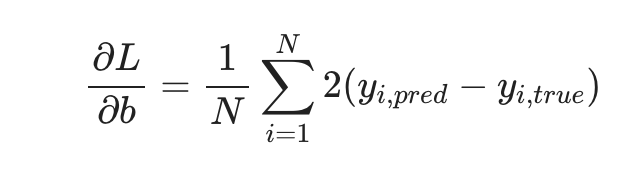

In [12]:
def gradient(X, W, b, y):
    
    # N = 가중치 받을 데이터 수
    N = len(W)
    
    # y_pred
    y_pred = model(X, W, b)
    
    # gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('Done!')

Done!


In [13]:
dW, db = gradient(df_X, W, b, df_y)
print('dW: ', dW)
print('db: ', db)

dW:  [ -60.6455887   -13.77478923 -189.59635994 -142.65369555  -68.2419201
  -55.98986234  127.71987687 -139.05463396 -182.87652537 -123.53857985]
db:  -303.9506356771619


### 08. learning rate (하이퍼 파라미터) 설정하기

In [14]:
# 임의 지정 후 조정
learning_rate = 0.005

### 09. 모델 학습하기

In [15]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        


Iteration 10 : Loss 25373.5701
Iteration 20 : Loss 21703.4925
Iteration 30 : Loss 18685.0291
Iteration 40 : Loss 16200.4233
Iteration 50 : Loss 14153.3076
Iteration 60 : Loss 12464.8116
Iteration 70 : Loss 11070.3790
Iteration 80 : Loss 9917.1640
Iteration 90 : Loss 8961.9017
Iteration 100 : Loss 8169.1660
Iteration 110 : Loss 7509.9445
Iteration 120 : Loss 6960.4731
Iteration 130 : Loss 6501.2823
Iteration 140 : Loss 6116.4173
Iteration 150 : Loss 5792.8000
Iteration 160 : Loss 5519.7066
Iteration 170 : Loss 5288.3409
Iteration 180 : Loss 5091.4848
Iteration 190 : Loss 4923.2122
Iteration 200 : Loss 4778.6554
Iteration 210 : Loss 4653.8136
Iteration 220 : Loss 4545.3961
Iteration 230 : Loss 4450.6942
Iteration 240 : Loss 4367.4765
Iteration 250 : Loss 4293.9027
Iteration 260 : Loss 4228.4534
Iteration 270 : Loss 4169.8726
Iteration 280 : Loss 4117.1206
Iteration 290 : Loss 4069.3352
Iteration 300 : Loss 4025.8003
Iteration 310 : Loss 3985.9199
Iteration 320 : Loss 3949.1968
Iteration 

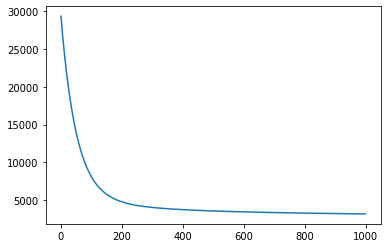

[  26.26374224  -90.03551633  353.9295439   234.55134163   11.10107342
  -28.94438433 -189.07664836  149.43345345  312.06744886  148.59526712] 153.88513755144092


In [16]:
plt.plot(losses)
plt.show()

print(W, b)

### 10. test 데이터에 대해 성능 확인하기

In [17]:
prediction = model(x_test, W, b)
mse = loss(x_test, W, b, y_test)
mse

2862.9851035762413

### 11. 결과 시각화하기

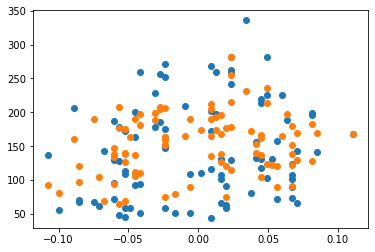

In [18]:
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], prediction)
plt.show()

▶︎ 생각만큼 효율적이진 않지만, 그럭저럭 예측이 들어 맞는다.

---

# E02_proj 02. <span style="color:slateblue">자전거 타는 사람 몇 명인지 맞추기</span>

### 01. 데이터 & 필요한 함수 가져오기

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [80]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


> #### 12개의 feature를 가진 10886개의 데이터셋
> - datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count
>
> 보아하니 target column은 count겠지?

### 02. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
> ##### pandas.to_datetime 함수 참고
> - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime

▶︎ datetime 컬럼을 지정해서 dtype을 변환한다. 

연, 월, 일, 시, 분, 초 순으로 배열돼 있으니 format 인자를 변경할 필요는 없다.

▶︎ datetime 컬럼을 편의상 오른쪽으로 밀어준다.

In [81]:
train = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
             'humidity', 'windspeed', 'casual', 'registered', 'count', 'datetime']]

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [82]:
train['datetime'] = pd.to_datetime(train['datetime'])

print('Done!')

Done!


▶︎ year, month, day, hour, minute, second 컬럼을 추가한다.

In [83]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

print('Done!')

Done!


▶︎ 잘 들어갔는지 확인해 보자.

In [84]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4,0,0


▶︎ 오른쪽에 가서 찰떡같이 잘 붙었다.

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

- sns.countplot 활용 
- subplot을 활용해서 한 번에 6개의 그래프를 한번에 시각화

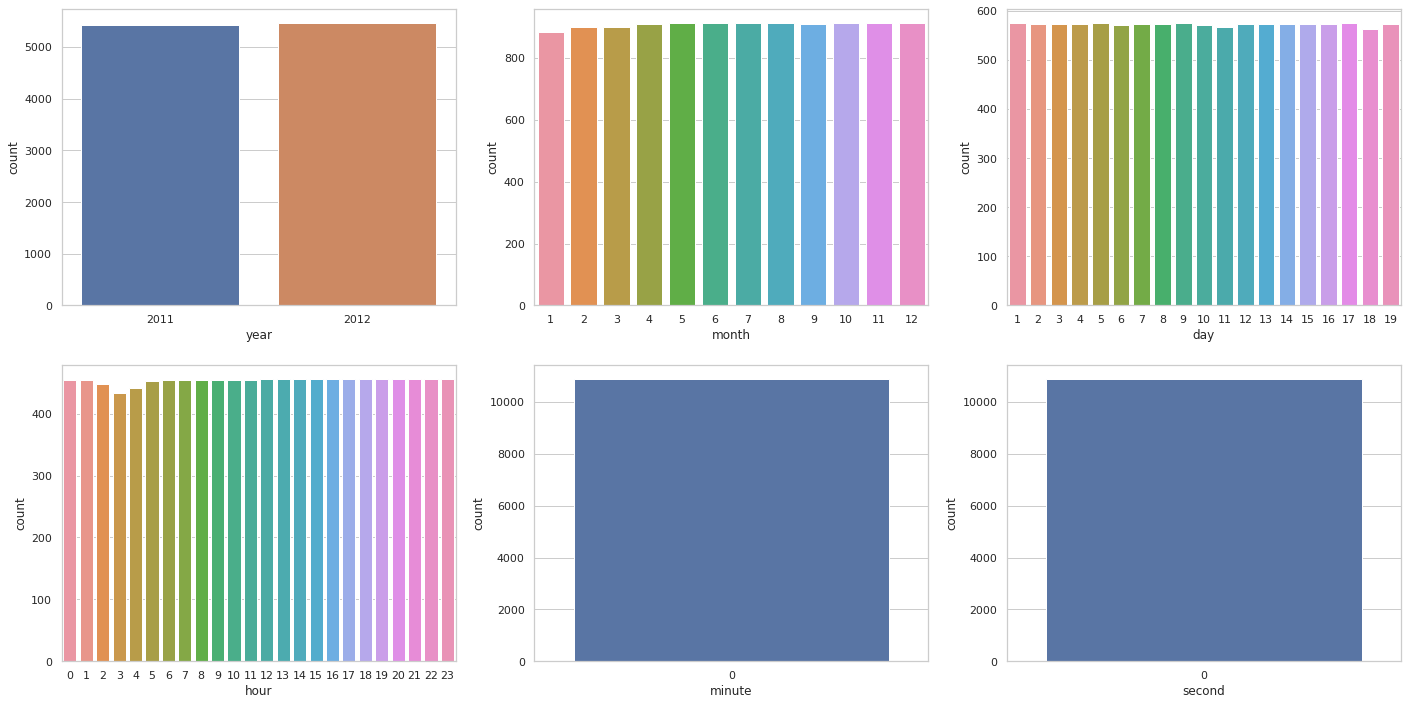

In [85]:
# keys = ['year', 'month', 'day', 'hour', 'minute', 'second']

# 2x3 subplot 생성
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

# 차트 크기 조절
figure.set_size_inches(24,12)

# 개수 카운트
year = sns.countplot(x='year', data=train, ax=ax1)
month = sns.countplot(x='month', data=train, ax=ax2)
day = sns.countplot(x='day', data=train, ax=ax3)
hour = sns.countplot(x='hour', data=train, ax=ax4)
minute = sns.countplot(x='minute', data=train, ax=ax5)
second = sns.countplot(x='second', data=train, ax=ax6)


### (4) X, y 컬럼 선택 및 train/test 데이터 분리

- X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [137]:
# 문자열 데이터 (datetime) 및 무의미 데이터(casual, registered) 제거
X = train[['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
           'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second']].values

# target column
y = train['count'].values


In [138]:
# train / test 데이터 나누기
X_train, x_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=17)


### (5) LinearRegression 모델 학습

In [139]:
# 모델 학습

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [140]:
# 예측값 계산
prediction = model.predict(x_test)
prediction


array([257.67626405, 224.05963303, 234.4945635 , ..., 183.23654675,
       262.1506117 ,  10.54562078])

In [141]:
# 손실함수값 계산
mse = mean_squared_error(y_test, prediction)

# 출력
print(mse)
print(mse**0.5) # rmse


20410.62813329893
142.8657696346432


### x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- temp는 4번째, humidity는 6번째 칼럼


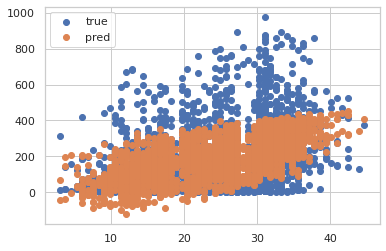

In [142]:
# temp

plt.scatter(x_test[:, 4], y_test, label="true")
plt.scatter(x_test[:, 4], prediction, label="pred")
plt.legend()
plt.show()

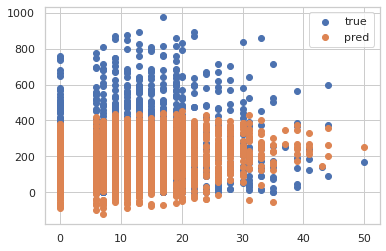

In [143]:
# humidity

plt.scatter(x_test[:, 6], y_test, label="true")
plt.scatter(x_test[:, 6], prediction, label="pred")
plt.legend()
plt.show()

▶︎ 중간으로 수렴하는 걸로 봐서 예측 모델이 그럭저럭 잘 굴러가고 있다.

---

## Q. 그렇다면... <span style="color:indianred">"날씨 좋은 날 월요일 오후 3시"</span>에 자전거 타는 사람은 몇 명일까?

> **날씨 좋은 날** = weather 값이 1, **오후 3시** = hour 값이 15
>
> _그런데... 월요일인지는 **어떻게** 알지?_

### Thinking...

🤔 요일을 알려주는 함수를 써서 컬럼을 가공하면 되겠지?
> **[dt.dayofweek]** | https://bit.ly/3ya9Jvi

In [144]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime,year,month,day,hour,minute,second,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4,0,0,5


> 위에서 데이터 잘 가공해 놨으니 조금만 손 봐서 쓰도록 하자.
>
> **월요일 == 0** 이다.

In [150]:
# 날씨가 좋은 월요일 오후 3시

monday = train[(train['weather'] == 1) & (train['dayofweek'] == 0) & (train['hour'] == 15)]
monday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 60 to 10493
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      43 non-null     int64         
 1   holiday     43 non-null     int64         
 2   workingday  43 non-null     int64         
 3   weather     43 non-null     int64         
 4   temp        43 non-null     float64       
 5   atemp       43 non-null     float64       
 6   humidity    43 non-null     int64         
 7   windspeed   43 non-null     float64       
 8   casual      43 non-null     int64         
 9   registered  43 non-null     int64         
 10  count       43 non-null     int64         
 11  datetime    43 non-null     datetime64[ns]
 12  year        43 non-null     int64         
 13  month       43 non-null     int64         
 14  day         43 non-null     int64         
 15  hour        43 non-null     int64         
 16  minute      43 non-null 

### 어... 데이터가 너무 적네?
- 컬럼이 19갠데... 데이터가 43개네...
- 이러면 돌려봤자 성능이 그럭저럭일 것 같은데 그냥 평균 내는 게 낫지 않을까?

In [156]:
# 오버피팅 뜨더라도 돌려는 보자.. 평균값이랑 비교해보게

X_m = monday[['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
           'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek']].values

y_m = monday['count'].values

print('Done!')

Done!


In [159]:
# 모델링, 학습, 손실함수까지

X_m_train, x_m_test, y_m_train, y_m_test = tts(X_m, y_m, test_size=0.1, random_state=17)

model_m = LinearRegression()
model_m.fit(X_m_train, y_m_train)

pred_m = model_m.predict(x_m_test)
pred_m

mse = mean_squared_error(y_m_test, pred_m)
print(mse)
print(mse**0.5)

7859.912029121447
88.65614490333677


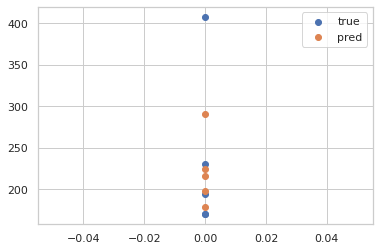

In [169]:
# 시각화 해봅시다

plt.scatter(x_m_test[:, 13], y_m_test, label="true")
plt.scatter(x_m_test[:, 13], pred_m, label="pred")
plt.legend()
plt.show()

▶︎ 이제 평균값이랑 비교를 해보자.

In [172]:
# 평균값
print(y_m.mean())

215.13953488372093


### 결론: 3배 가까이 차이난다 😢

# <span style="color:slateblue">회고</span>

프로젝트 1에서 그래프 기울기가 낮아질수록 결과값이 좋게 나올 줄 알았는데 아니었다.

수학 공부... 다시 해야 할 것 같다. 특히 미분 😨

learning rate도 아직 잘 이해가 안 된다.

밑시딥 책에 해당 파트에 대한 내용이 있던데, 다시 읽어보고 벨로그에 정리해야 할 것 같다.

MSE, RMSE가 직관적으로는 이해가 되는데 수식이 잘 이해가 안되서...

(또 수학...)


더 공부하겠습니다... 수학 스터디라도 만들어야 하나... 에효....

> ### Ref.
>
> - [addison's velog]      | https://bit.ly/38OugLu
> - [Seaborn countplot]    | https://blog.naver.com/ai05024/222314685144